# Intrusion detection in UNSW using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import catboost as cb

# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("../final_datasets/ton_iot_binary.csv")

In [3]:
df

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,192.168.1.133,224.0.0.251,5353,5353,1.554220e+09,1.554221e+09,False,10,0,...,139.625213,0.874133,0.267197,12.751683,47.723840,5.302649,0.105342,26.960027,1.111111,1.0
1,1,fe80::1087:c341:7263:ead3,ff02::fb,5353,5353,1.554220e+09,1.554221e+09,False,11,0,...,138.441980,0.902084,0.262991,12.550874,47.723620,4.772362,0.104397,26.960008,1.000000,1.0
2,2,192.168.1.152,192.168.1.192.,1880,40571,1.554220e+09,1.554221e+09,False,2534,0,...,806.747481,2.775578,0.498117,149.388050,299.905341,0.118399,0.000009,0.869108,1.950257,1.0
3,3,192.168.1.152,192.168.1.190.,1880,43539,1.554220e+09,1.554221e+09,False,2405,0,...,833.488650,3.295854,0.499061,149.670896,299.905281,0.124753,0.000013,0.869398,1.982529,1.0
4,4,192.168.1.190,192.168.1.152.,43539,1880,1.554220e+09,1.554221e+09,False,2396,0,...,60.000000,0.000000,0.497263,149.131741,299.905242,0.125221,0.000033,0.869425,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467409,3467409,192.168.1.195,52.147.9.175.,51670,443,1.556365e+09,1.556365e+09,True,11,0,...,493.208789,4.800728,0.549271,0.124318,0.226333,0.022633,0.000118,0.145608,1.400000,1.0
3467410,3467410,192.168.1.195,52.147.9.175.,51778,443,1.556365e+09,1.556365e+09,True,10,0,...,518.255728,4.991372,0.555707,0.044454,0.079996,0.008888,0.000783,0.017896,1.555556,1.0
3467411,3467411,52.147.9.175,192.168.1.195.,443,51670,1.556365e+09,1.556365e+09,True,10,0,...,1074.271893,0.912363,0.417557,0.091755,0.219742,0.024416,0.000005,0.157580,1.333333,1.0
3467412,3467412,52.147.9.175,192.168.1.195.,443,51778,1.556365e+09,1.556365e+09,True,10,0,...,1066.161620,0.875264,0.418338,0.032386,0.077416,0.008602,0.000004,0.025017,1.333333,1.0


In [9]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [10]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes


for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [11]:
df

,LABEL,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS,LABEL_code
0,False,10,0,792,0,139,11.445523,131,-0.847845,126,150,24,8.234189,10,7.194245,139.625213,0.874133,0.267197,12.751683,47.723840,5.302649,0.105342,26.960027,1.111111,1.0,0
1,False,11,0,858,0,138,11.575837,134,-0.845218,126,150,24,8.388288,10,7.246377,138.441980,0.902084,0.262991,12.550874,47.723620,4.772362,0.104397,26.960008,1.000000,1.0,0
2,False,2534,0,1536348,0,666,454.946151,206976,-0.188282,64,2673,2609,68.310233,382,57.357357,806.747481,2.775578,0.498117,149.388050,299.905341,0.118399,0.000009,0.869108,1.950257,1.0,0
3,False,2405,0,1493560,0,681,480.631876,231007,-0.172488,64,2673,2609,70.577368,394,57.856094,833.488650,3.295854,0.499061,149.670896,299.905281,0.124753,0.000013,0.869398,1.982529,1.0,0
4,False,2396,0,0,0,60,0.000000,0,-1.000000,60,60,0,0.000000,0,0.000000,60.000000,0.000000,0.497263,149.131741,299.905242,0.125221,0.000033,0.869425,0.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467409,True,11,0,2356,0,274,429.984883,184887,0.221574,60,1425,1365,156.928790,294,107.299270,493.208789,4.800728,0.549271,0.124318,0.226333,0.022633,0.000118,0.145608,1.400000,1.0,1
3467410,True,10,0,2280,0,288,454.171774,206272,0.223899,60,1492,1432,157.698533,300,104.166667,518.255728,4.991372,0.555707,0.044454,0.079996,0.008888,0.000783,0.017896,1.555556,1.0,1
3467411,True,10,0,7763,0,836,710.760156,505180,-0.080969,60,1520,1460,85.019157,655,78.349282,1074.271893,0.912363,0.417557,0.091755,0.219742,0.024416,0.000005,0.157580,1.333333,1.0,1
3467412,True,10,0,7600,0,820,718.254133,515889,-0.066144,60,1520,1460,87.591967,671,81.829268,1066.161620,0.875264,0.418338,0.032386,0.077416,0.008602,0.000004,0.025017,1.333333,1.0,1


In [12]:
print(f"iot: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")

iot: 3456561	clear: 10853


In [13]:
df = df[["LABEL"] + features].copy()

In [14]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [15]:
df.shape

(3467414, 25)

In [16]:
print(f"iot: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")
# print(f"botnet: {len(df[df['LABEL_code'] == 1])}\tclear: {len(df[df['LABEL_code'] == 0])}")

iot: 3456561	clear: 10853


In [17]:
df_validation = df.sample(n=500000)
df_features =  df[~df.isin(df_validation)].dropna()

In [18]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [19]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 30, 2),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 80, 400, 20),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [20]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [1:37:00<00:00, 58.21s/trial, best loss: -0.9997256651774472]
The best hyperparameters are :  

{'colsample_bytree': 0.1868365188430528, 'gamma': 3.091305530984216, 'max_depth': 16.0, 'min_child_weight': 13.0, 'n_estimators': 180.0, 'reg_alpha': 0.0, 'reg_lambda': 0.008690563872194315}


In [21]:
def XGBoost_classification_tunned(best_hyperparams):
      X=df_features[features]  # Features
      y=df_features['LABEL']  # Labels
      #Split on train and test
      X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
      X_train = X_train_a[features]
      X_test = X_test_a[features] 
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
      precision = precision_score(y_test, y_pred)  * 100
      recall = recall_score(y_test, y_pred)  * 100
      F1 = f1_score(y_test, y_pred)  * 100
      print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

99.95 & 99.96 & 99.99 & 99.97 \\


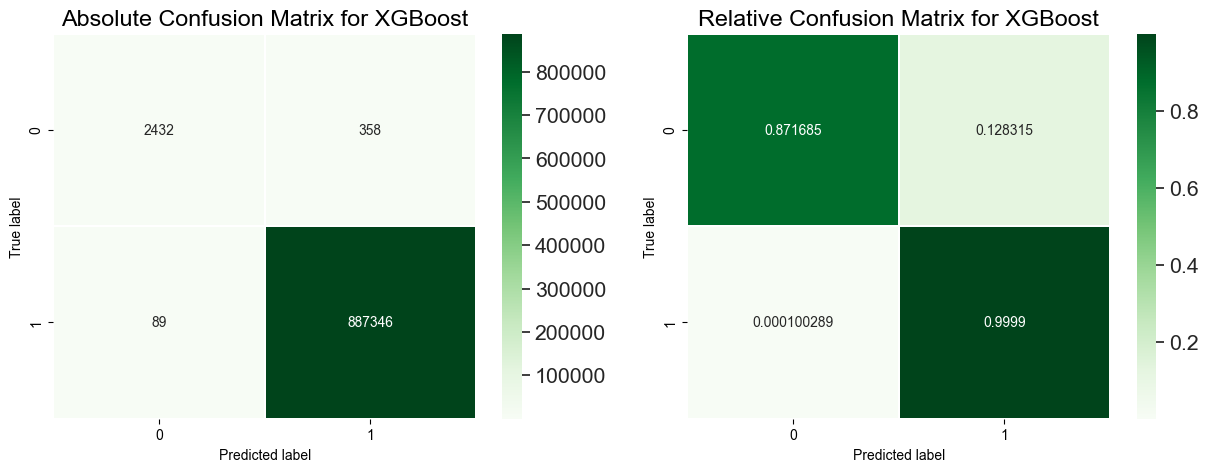

In [22]:
model = XGBoost_classification_tunned(best_hyperparams)

In [23]:

def while_XGBoost_classification_tunned(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL']  # Labels
    best_results = (0,"",None,None, None)
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
        for F, N in zip(
                [ features], # statistics_features, time_features, distribution_features, frequency_features, behavior_features, 
                [ "All"], # "Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based", 
        ):
                X_train = X_train_a[F]
                X_test = X_test_a[F] 
                model = XGBClassifier(
                        n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                        reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                        colsample_bytree=int(best_hyperparams['colsample_bytree']),
                        # subsample=int(best_hyperparams['subsample']),
                        # eta=best_hyperparams['eta'],
                )
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
                precision = precision_score(y_test, y_pred)  * 100
                recall = recall_score(y_test, y_pred)  * 100
                F1 = f1_score(y_test, y_pred)  * 100
                if N == "All":
                    tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\hline"
                    tmp_str += "\n"
                    tmp_f1 = F1
                elif N in ["Statistical-based", "Distribution-based", "Behavior-based"]:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
                else:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & \\rowcolor{LigthGray} " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
        if best_results[0] < tmp_f1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (tmp_f1, tmp_str, matrix, percentage_matrix, model)
    print("")
    print("")
    print("")
    print(best_results[0])
    print(best_results[1])
    plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4]

24


99.97515723890456
\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.95 & 99.96 & 99.99 & 99.98 \\
\hline



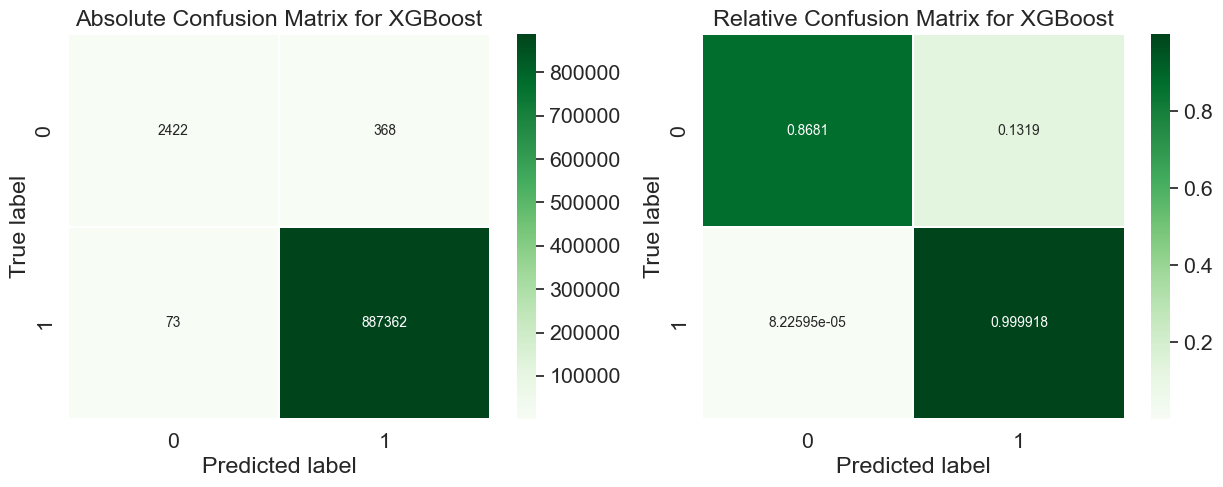

In [24]:
best_model = while_XGBoost_classification_tunned(best_hyperparams, cycles=25)

# Validation

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.95 & 99.96 & 99.99 & 99.97 \\
\hline



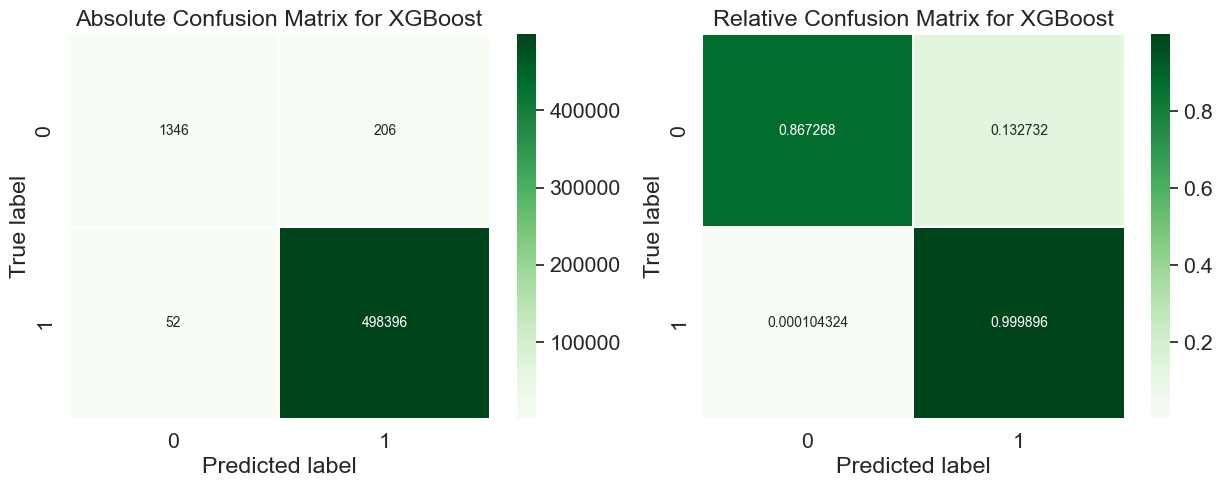

In [25]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL']  # Labels
    

y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

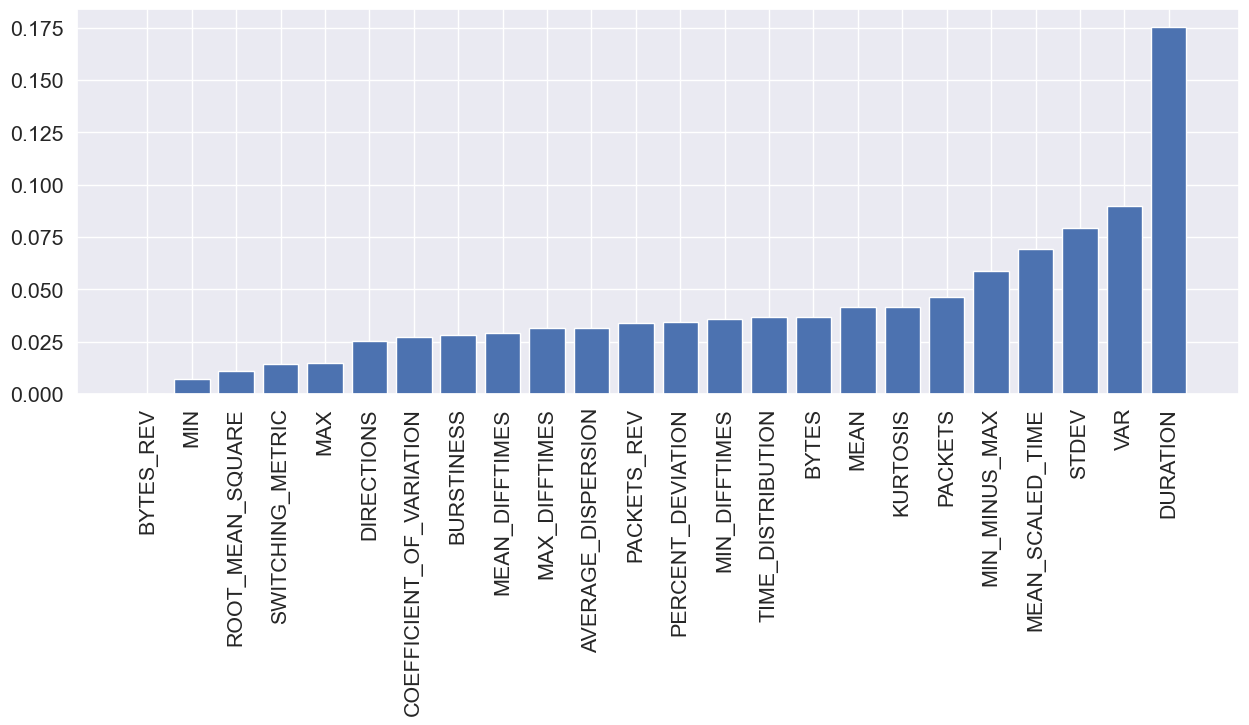

In [26]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [27]:
feat_importances.to_dict()

{'BYTES_REV': 0.0,
 'MIN': 0.00699557876214385,
 'ROOT_MEAN_SQUARE': 0.010984573513269424,
 'SWITCHING_METRIC': 0.014207165688276291,
 'MAX': 0.014630001969635487,
 'DIRECTIONS': 0.025125209242105484,
 'COEFFICIENT_OF_VARIATION': 0.027409112080931664,
 'BURSTINESS': 0.028102029114961624,
 'MEAN_DIFFTIMES': 0.029286885634064674,
 'MAX_DIFFTIMES': 0.03141241893172264,
 'AVERAGE_DISPERSION': 0.031527020037174225,
 'PACKETS_REV': 0.0341249518096447,
 'PERCENT_DEVIATION': 0.034306321293115616,
 'MIN_DIFFTIMES': 0.03608088940382004,
 'TIME_DISTRIBUTION': 0.03675636649131775,
 'BYTES': 0.03689815476536751,
 'MEAN': 0.04169590398669243,
 'KURTOSIS': 0.04180220887064934,
 'PACKETS': 0.04643658176064491,
 'MIN_MINUS_MAX': 0.0589442253112793,
 'MEAN_SCALED_TIME': 0.06913242489099503,
 'STDEV': 0.07927576452493668,
 'VAR': 0.089716337621212,
 'DURATION': 0.17514990270137787}